# Questao 1
O conjunto de microdados do ENEM 2022 possui 3.476.105 linhas, uma numerosidade muito grande para nosso contexto. Sua primeira tarefa é fazer a leitura do arquivo CSV por blocos e então realizar filtragem e amostragem em cada bloco para diminuir a numerosidade, salvando ao final um CSV com numerosidade reduzida. Tente alcançar uma tabela entre 50 mil e 100 mil linhas.
Para leitura por blocos, use a opção chunksize de read_csv

In [6]:
import pandas as pd

uf = ['AL', 'BA', 'CE', 'SE', 'RN', 'PI', 'PB', 'PE', 'MA']

db = pd.read_csv('micro_dados/DADOS/MICRODADOS_ENEM_2022.csv', encoding="cp1252", delimiter=";")
db.dropna(subset='SG_UF_ESC', inplace=True)
db_nordeste = db[(db["SG_UF_ESC"] == 'AL') | (db["SG_UF_ESC"] == 'BA') | (db["SG_UF_ESC"] == 'CE') | (db["SG_UF_ESC"] == 'SE') | (db["SG_UF_ESC"] == 'RN') | (db["SG_UF_ESC"] ==  'PI') | (db["SG_UF_ESC"] == 'PB') | (db["SG_UF_ESC"] == 'PE') | (db["SG_UF_ESC"] == 'MA')]


Para isso foi escolhido realizar um estudo de todo o nordeste para entender melhor o perfil e tendências da região.

In [7]:
print(len(db_nordeste))
print(db_nordeste.shape)

299663
(299663, 76)


In [8]:
db_nordeste.to_csv("base_dados_ml_nordeste.csv", encoding="cp1252")

Load data

In [1]:
import pandas as pd
db = pd.read_csv('base_dados_ml_nordeste.csv', encoding="cp1252")
db.dropna(inplace=True)
db.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', '

Remove-se campos que possuem valores NaN e podem resultar em erros.

In [2]:
db.shape

(216000, 77)

# Questão 2

Com base no conjunto de dados reduzido, crie um subconjunto de dados, que será utilizado para predição da faixa de notas de uma prova do ENEM.

## a)
Para este subconjunto escolha um atributo de nota de uma das provas do ENEM, selecione também 10 outros atributos não relacionados às provas (não pertencentes aos atributos da seção Dados da Prova Objetiva nem da seção Dados da Redação). 


TP_FAIXA_ETARIA(Faixa etária): Uma idade mais próxima da possível saída do ensino médio, cerca de 18 anos, tem consequência nas notas por conta dos assuntos estarem mais recentes;

TP_ESTADO_CIVIL(Estado civil): A depender da estado civil o participante poderá ter mais responsabilidades e, então, menos condições de estudo;

TP_ST_CONCLUSAO(Situação de conclusão do ensino médio): Um aluno que já fechou o ciclo do ensino médio tende a estar mais preparado do que os demais;

TP_ESCOLA(Tipo escola do ensino médio): As escolas particulares podem influenciar em maiores notas, por conta de maior preparação e incentivo;

Q002(Escolaridade da mãe): Quando os membros da família possuem uma maior formação há mais incentivo e influências aos estudos;

Q005(Quantas pessoas moram na sua residência): A quantidade de pessoas na casa pode influenciar em condições e padrões de estudo do participante;

Q006(Renda mensal familiar): Uma maior renda resulta em melhores condições de estudos, consequentemente em melhores notas;

Q021(Tem TV por assinatura): A exposição do estudante ao conhecimento de mundo, através de notícias e programas, desenvolvem o senso crítico, além das informações que são absorvidas;

Q024(Tem computador): A exposição do estudante à jogos e/ou novas tecnologias influenciam no raciocínio lógico, além de ser vital em um mundo globalizado;

Q025(Tem internet): A exposição do estudante ao conhecimento de mundo mais abrangente e à comunidade desenvolvem ele das mais diversas formas.

Obs: Tv por assinatura, computador e internet estão fortemente conectadas entre elas e à renda familiar, porém, cada uma delas tem uma gama de informações diferentes que são apresentadas e quando há uma maior variabilidade de informações, e, da maneira como são passadas, desenvolve melhor o senso crítico do estudante.

In [1]:
colunas = ['TP_FAIXA_ETARIA', 'TP_ESTADO_CIVIL', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'Q002', 'Q005', 'Q006', 'Q021', 'Q024', 'Q025']

def get_db(colunas, db=db):
  db_ = db.get(colunas).copy()
  
  Qs = [a for a in colunas if a[0] == 'Q'] #['Q025', 'Q024', 'Q006', 'Q022']
  for q in Qs:
    try:
      db_[q] = db_[q].apply(lambda x: ord(x) - ord('A'))
    except:
      pass
  return db_

db_ = get_db(colunas)
db_.hist(bins=10)

NameError: name 'db' is not defined

Contagem dos valores presentes no histograma.

In [42]:
for col in colunas:
  print(f"Valores para {col}: ", dict(db_[col].value_counts()))

Valores para TP_FAIXA_ETARIA:  {3: 94946, 2: 89762, 4: 19390, 5: 5431, 1: 3131, 6: 1527, 7: 536, 11: 307, 8: 284, 9: 157, 12: 149, 10: 121, 13: 110, 14: 68, 15: 36, 16: 22, 17: 18, 18: 2, 19: 2, 20: 1}

Valores para TP_ESCOLA:  {2: 172907, 3: 43093}

Valores para Q006:  {1: 93543, 2: 32533, 3: 19128, 0: 16931, 4: 11727, 7: 8175, 6: 8001, 5: 6516, 8: 3391, 9: 2419, 16: 2380, 11: 2245, 12: 2165, 14: 1720, 15: 1713, 10: 1709, 13: 1704}

Valores para Q024:  {0: 130438, 1: 61676, 2: 14953, 3: 6097, 4: 2836}

Valores para Q025:  {1: 190569, 0: 25431}

Valores para TP_SEXO:  {0: 118918, 1: 97082}

Valores para TP_ESTADO_CIVIL:  {1: 207251, 0: 6582, 3: 1226, 2: 900, 4: 41}

Valores para Q021:  {0: 176449, 1: 39551}

Valores para TP_ST_CONCLUSAO:  {2: 216000}

Valores para Q005:  {4: 80942, 3: 57426, 5: 37765, 2: 19412, 6: 12607, 7: 4274, 8: 1708, 9: 635, 1: 562, 10: 353, 11: 106, 12: 91, 13: 39, 14: 32, 20: 16, 15: 14, 16: 8, 17: 6, 19: 3, 18: 1}

Valores para Q022:  {3: 63742, 2: 59372, 4: 48

Analisando os atributos escolhidos percebeu-se que "TP_ESCOLA" pode ser binarizado entre público ou privado.
Dessa forma, tem-se True para público e False para privado.

TP_ST_CONCLUSAO possui apenas um valor presente, por isso, torna-se desnecessário para a classificação. Dessa forma, precisa-se de um atributo melhor para a mesma.

<Axes: >

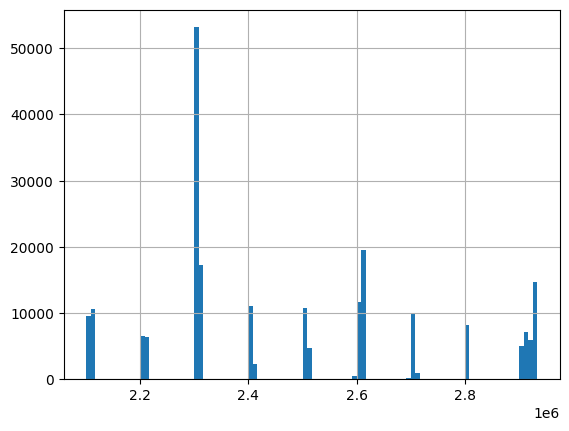

In [43]:
db['CO_MUNICIPIO_ESC'].hist(bins=100)

Pelo histograma acima percebe-se que CO_MUNICIPIO_ESC não é um bom atributo, uma vez que possui muitos valores possíveis.

<Axes: >

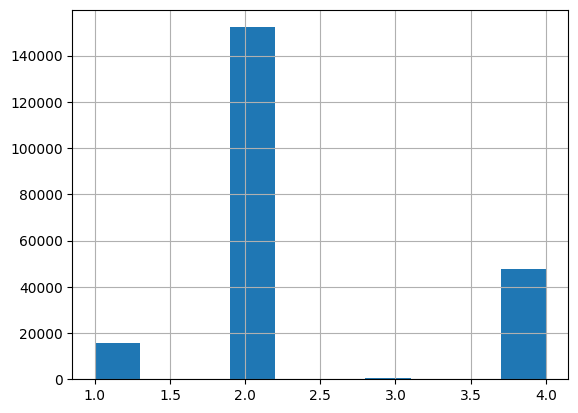

In [44]:
db['TP_DEPENDENCIA_ADM_ESC'].value_counts()
db['TP_DEPENDENCIA_ADM_ESC'].hist(bins=10)

Todos os valores de TP_DEPENDENCIA_ADM_ESC remetem à escola pública, a qual já está sendo analisada por TP_ESCOLA.

<Axes: >

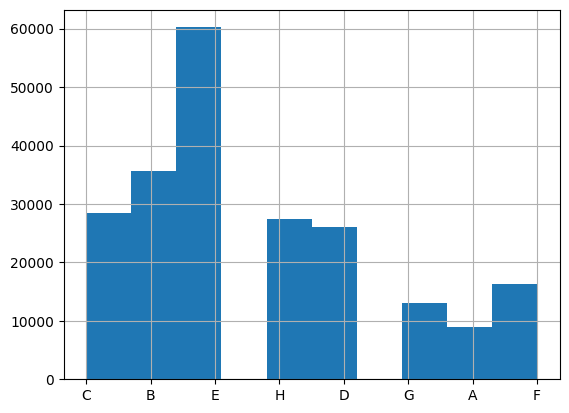

In [45]:
db['Q001'].hist(bins=10)

Adicionamos Q001 (escolaridade pai) no lugar de TP_ST_CONCLUSAO, pois uma família com boa base de estudos influencia o participante.

In [46]:
colunas = [
 'TP_FAIXA_ETARIA',
 'TP_ESTADO_CIVIL',
 'TP_ESCOLA',
 'Q001',
 'Q002',
 'Q005',
 'Q006',
 'Q021',
 'Q024',
 'Q025', 
 'NU_NOTA_REDACAO',
 'TP_STATUS_REDACAO']
db_ = get_db(colunas)

Esses foram os atributos escolhidos.

In [47]:
print(db_.shape)
db_

(216000, 13)


,TP_FAIXA_ETARIA,TP_ESCOLA,Q006,Q024,Q025,TP_SEXO,TP_ESTADO_CIVIL,Q021,Q001,Q005,Q022,NU_NOTA_REDACAO,TP_STATUS_REDACAO
1,5,2,1,0,1,0,1,0,2,4,2,560.0,1.0
3,3,2,0,0,0,0,1,0,1,5,2,380.0,1.0
4,4,2,1,0,1,1,1,0,4,2,2,700.0,1.0
5,2,2,2,1,1,0,1,0,2,9,3,540.0,1.0
6,3,2,1,0,1,0,1,0,4,3,2,860.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299649,3,2,5,0,1,1,1,0,4,3,3,600.0,1.0
299654,4,2,1,0,0,0,1,0,0,3,1,180.0,1.0
299656,2,3,4,1,1,1,1,1,4,3,3,680.0,1.0
299657,5,2,2,1,1,0,1,0,4,4,0,400.0,1.0


Não foi encontrado como fazer one hot encode pelo sklearn, realizando-o, assim, de forma manual.

In [48]:
# nosso one hot encode
c = 0
for a in db_['TP_ESTADO_CIVIL'].value_counts().index:
    db_['TP_ESTADO_CIVIL' + str(a)] = (a == db_['TP_ESTADO_CIVIL']) * 1
    colunas.append('TP_ESTADO_CIVIL' + str(a))
    c += 1
db_.drop(['TP_ESTADO_CIVIL'], axis=1)
del(colunas[6])
print(colunas)
db_

['TP_FAIXA_ETARIA', 'TP_ESCOLA', 'Q006', 'Q024', 'Q025', 'TP_SEXO', 'Q021', 'Q001', 'Q005', 'Q022', 'NU_NOTA_REDACAO', 'TP_STATUS_REDACAO', 'TP_ESTADO_CIVIL1', 'TP_ESTADO_CIVIL0', 'TP_ESTADO_CIVIL3', 'TP_ESTADO_CIVIL2', 'TP_ESTADO_CIVIL4']


,TP_FAIXA_ETARIA,TP_ESCOLA,Q006,Q024,Q025,TP_SEXO,TP_ESTADO_CIVIL,Q021,Q001,Q005,Q022,NU_NOTA_REDACAO,TP_STATUS_REDACAO,TP_ESTADO_CIVIL1,TP_ESTADO_CIVIL0,TP_ESTADO_CIVIL3,TP_ESTADO_CIVIL2,TP_ESTADO_CIVIL4
1,5,2,1,0,1,0,1,0,2,4,2,560.0,1.0,1,0,0,0,0
3,3,2,0,0,0,0,1,0,1,5,2,380.0,1.0,1,0,0,0,0
4,4,2,1,0,1,1,1,0,4,2,2,700.0,1.0,1,0,0,0,0
5,2,2,2,1,1,0,1,0,2,9,3,540.0,1.0,1,0,0,0,0
6,3,2,1,0,1,0,1,0,4,3,2,860.0,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299649,3,2,5,0,1,1,1,0,4,3,3,600.0,1.0,1,0,0,0,0
299654,4,2,1,0,0,0,1,0,0,3,1,180.0,1.0,1,0,0,0,0
299656,2,3,4,1,1,1,1,1,4,3,3,680.0,1.0,1,0,0,0,0
299657,5,2,2,1,1,0,1,0,4,4,0,400.0,1.0,1,0,0,0,0


## b)

Para o atributo de nota da prova escolhida, crie um novo atributo com a discretização da nota em 4 quartis (apresente os valores delimitantes), e seleciona somente as linhas pertencentes ao primeiro e ao quarto quartil. 


Inicialmente tenta-se entender esta situação das notas da redação presentes.

<Axes: >

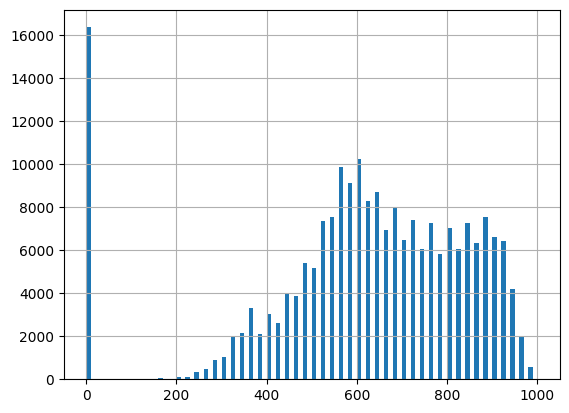

In [49]:
db['NU_NOTA_REDACAO'].hist(bins=100)

Existem muitas notas 0, precisa-se saber se as mesmas são válidas para a análise.

<Axes: >

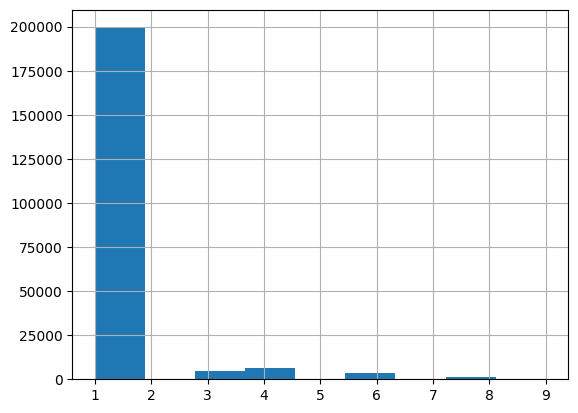

In [50]:
db["TP_STATUS_REDACAO"].hist(bins = 9)

Filtra-se as provas que tiveram problemas.

In [51]:
db_

,TP_FAIXA_ETARIA,TP_ESCOLA,Q006,Q024,Q025,TP_SEXO,TP_ESTADO_CIVIL,Q021,Q001,Q005,Q022,NU_NOTA_REDACAO,TP_STATUS_REDACAO,TP_ESTADO_CIVIL1,TP_ESTADO_CIVIL0,TP_ESTADO_CIVIL3,TP_ESTADO_CIVIL2,TP_ESTADO_CIVIL4
1,5,2,1,0,1,0,1,0,2,4,2,560.0,1.0,1,0,0,0,0
3,3,2,0,0,0,0,1,0,1,5,2,380.0,1.0,1,0,0,0,0
4,4,2,1,0,1,1,1,0,4,2,2,700.0,1.0,1,0,0,0,0
5,2,2,2,1,1,0,1,0,2,9,3,540.0,1.0,1,0,0,0,0
6,3,2,1,0,1,0,1,0,4,3,2,860.0,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299649,3,2,5,0,1,1,1,0,4,3,3,600.0,1.0,1,0,0,0,0
299654,4,2,1,0,0,0,1,0,0,3,1,180.0,1.0,1,0,0,0,0
299656,2,3,4,1,1,1,1,1,4,3,3,680.0,1.0,1,0,0,0,0
299657,5,2,2,1,1,0,1,0,4,4,0,400.0,1.0,1,0,0,0,0


In [52]:
del(colunas[-c-1])
del(colunas[-c-1])

Index(['TP_FAIXA_ETARIA', 'TP_ESCOLA', 'Q006', 'Q024', 'Q025', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'Q021', 'Q001', 'Q005', 'Q022', 'NU_NOTA_REDACAO',
       'TP_STATUS_REDACAO', 'TP_ESTADO_CIVIL1', 'TP_ESTADO_CIVIL0',
       'TP_ESTADO_CIVIL3', 'TP_ESTADO_CIVIL2', 'TP_ESTADO_CIVIL4'],
      dtype='object') ['TP_FAIXA_ETARIA', 'TP_ESCOLA', 'Q006', 'Q024', 'Q025', 'TP_SEXO', 'Q021', 'Q001', 'Q005', 'Q022', 'TP_ESTADO_CIVIL1', 'TP_ESTADO_CIVIL0', 'TP_ESTADO_CIVIL3', 'TP_ESTADO_CIVIL2', 'TP_ESTADO_CIVIL4', 'NU_NOTA_REDACAO']


<Axes: >

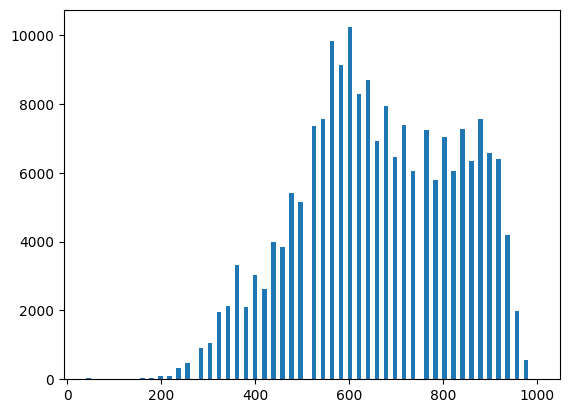

In [53]:
print(db_[db_['TP_STATUS_REDACAO'] == 1].copy().columns,colunas + ['NU_NOTA_REDACAO'])
db_ = get_db(colunas + ['NU_NOTA_REDACAO'], db_[db_['TP_STATUS_REDACAO'] == 1])
db_['NU_NOTA_REDACAO'].hist(bins=100, grid=False)

Pega-se o primeiro e o último quartil para poder analisar.

E as métricas.

In [55]:
dados = db_['NU_NOTA_REDACAO'].describe()
print(dados)
dados = dados['25%'], dados['75%']
db_redação = get_db( colunas + ['NU_NOTA_REDACAO'], db_)
db_redação = db_redação[((db_['NU_NOTA_REDACAO'] != 0) & (db_['NU_NOTA_REDACAO'] <= dados[0])) | (db_['NU_NOTA_REDACAO'] >= dados[1])].copy()
db_redação['result'] = (db_redação['NU_NOTA_REDACAO'] >= dados[1]) * 1
db_redação['result'].sum(), db_redação.shape

count    199647.000000
mean        661.734962
std         167.956363
min          40.000000
25%         540.000000
50%         660.000000
75%         800.000000
max        1000.000000
Name: NU_NOTA_REDACAO, dtype: float64


(53977, (105616, 17))

## c)

Analise os demais atributos, verifique os valores existentes e sua distribuição, verifique a existência de dados ausentes. Determine e realize os procedimentos de pré-processamento necessários. Pode ser necessário transformar atributos categóricos (por exemplo, transformando alguns valores categóricos em um valor único, ou aplicando one-hot-encoding). Pode ser necessário normalizar ou padronizar atributos. Pode haver demanda de imputar valores ou excluir linhas com dados ausentes. Você pode também criar/transformar outros atributos (por exemplo, discretizando valores numéricos, combinando dois atributos em um único atributo).


In [56]:
db_redação.dropna(inplace=True)
db_redação['result'].sum(), db_redação.shape

(53977, (105616, 17))

A quantia de 53977 representa os participantes que tiraram as melhores notas, ou seja, que estão no último quartil. Enquanto que 51639 fazem parte do primeiro quartil, possuindo as menores notas.

In [58]:
# Tabela normalizada e filtrada
db_redação

,TP_FAIXA_ETARIA,TP_ESCOLA,Q006,Q024,Q025,TP_SEXO,Q021,Q001,Q005,Q022,TP_ESTADO_CIVIL1,TP_ESTADO_CIVIL0,TP_ESTADO_CIVIL3,TP_ESTADO_CIVIL2,TP_ESTADO_CIVIL4,NU_NOTA_REDACAO,result
3,3,2,0,0,0,0,0,1,5,2,1,0,0,0,0,380.0,0
5,2,2,2,1,1,0,0,2,9,3,1,0,0,0,0,540.0,0
6,3,2,1,0,1,0,0,4,3,2,1,0,0,0,0,860.0,1
8,3,2,2,0,1,0,0,2,5,1,1,0,0,0,0,920.0,1
14,3,2,4,0,1,0,1,6,5,3,1,0,0,0,0,880.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299633,2,2,1,1,1,0,0,4,3,3,1,0,0,0,0,460.0,0
299646,4,2,1,0,1,0,0,1,3,2,1,0,0,0,0,180.0,0
299648,4,2,2,0,1,0,0,7,5,3,1,0,0,0,0,340.0,0
299654,4,2,1,0,0,0,0,0,3,1,1,0,0,0,0,180.0,0


# Questão 3

Realize a tarefa de classificação: predição da faixa de nota discretizada da prova a partir dos demais atributos.

## a)

Defina e descreva seu método de avaliação e medidas de avaliação. 

R:
Validação cruzada (Cross-validation)

  Repete a avaliação do modelo com difere ```F1-score```: essa métrica une precisão e recall afim de trazer um número único que determine a qualidade geral do nosso modelo.

  Usando o Stratified cross-validation, no qual folds mantém a mesma distribuição de classes do conjunto original

Medidas de avaliação:

  ```Acurácia``` = (TP + TN)/All -> acertos sobre total de predicts

  ```Sensibilidade``` ou ```Recall``` = TP/P -> verdadeiros positivos acertados

  ```Especificidade``` = TN/N -> verdadeiros negativos acertados


No teste sera feito um holdout dos dados de teste, e é feito um Cross-validation para determinar parametros que serao usado, para escolher o melhor parametro foi escolhido o maior F1-score, e entao esse classificador é treinado com todos os dados de treino e testado para obter os valores das metricas de avaliação, esse processo é repetido n vezes.

## b)

Escolha um modelo de aprendizado de máquina. Faça experimentos com variações de parâmetros (se houver) do modelo de aprendizado de máquina.

aqui sera feito um processo de escolha manual

In [59]:
from sklearn import  metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# experiment trocar KFold por StratifiedKFold, e trocar o classificador


X = get_db(colunas, db_redação)
y = get_db(["result"], db_redação)
from sklearn.model_selection import train_test_split
    # tenta fazer stratify ser equilibrado????
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [60]:
from sklearn.model_selection import cross_val_score
import numpy as np
scoring = ['precision_macro', 'recall_macro','balanced_accuracy']
for max_depth in range(2, 15):
  print(f'Max depth: {max_depth}')
  score_mean_vec = []
  for score in scoring:
    clf = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=5,scoring = score)
    print(f'\t{score}: {np.mean(scores), np.std(scores)}')
    score_mean_vec.append(np.mean(scores))
    # automatizar resultado

Max depth: 2
	precision_macro: (0.7314555543920177, 0.0013267801545159197)
	recall_macro: (0.7306933102956545, 0.001284710185911662)
	balanced_accuracy: (0.7306933102956545, 0.001284710185911662)
Max depth: 3
	precision_macro: (0.7314803895570228, 0.0013227316655481177)
	recall_macro: (0.730586329496652, 0.0013517077248257944)
	balanced_accuracy: (0.730586329496652, 0.0013517077248257944)
Max depth: 4
	precision_macro: (0.7496538679957652, 0.005292886558033836)
	recall_macro: (0.7380427605270338, 0.0013658495716911245)
	balanced_accuracy: (0.7380427605270338, 0.0013658495716911245)
Max depth: 5
	precision_macro: (0.7464517868527343, 0.0041731890304579885)
	recall_macro: (0.7423753993535953, 0.002493599187396587)
	balanced_accuracy: (0.7423753993535953, 0.002493599187396587)
Max depth: 6
	precision_macro: (0.7475117402808399, 0.0035923244980398533)
	recall_macro: (0.7435941542636468, 0.0021994907826278108)
	balanced_accuracy: (0.7435830975358789, 0.002198470437574603)
Max depth: 7
	prec

tamanho escolhido 4, apresenta performace boa com tamanho baixo

In [61]:
depth = 4
clf = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f"{metrics.classification_report(y_test, predicted)}\n")

              precision    recall  f1-score   support

           0       0.68      0.86      0.76     10328
           1       0.82      0.62      0.70     10796

    accuracy                           0.74     21124
   macro avg       0.75      0.74      0.73     21124
weighted avg       0.75      0.74      0.73     21124




## b)
Escolha um modelo de aprendizado de máquina. Faça experimentos com variações de parâmetros (se houver) do modelo de aprendizado de máquina.

aqui fazemos um processo automatizado

In [62]:
from sklearn import  metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# experiment trocar KFold por StratifiedKFold, e trocar o classificador


X = get_db(colunas, db_redação)
y = get_db(["result"], db_redação)
from sklearn.model_selection import train_test_split
    # tenta fazer stratify ser equilibrado????
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [63]:
from sklearn.model_selection import cross_val_score
import numpy as np
scoring = ['f1']

clf = DecisionTreeClassifier(max_depth=max_depth)
def test_variando_parametros(X, y, scoring, classifier_class, variador, trys, test_size=0.2, stratify=None, cv=5, file=None):
  __scores = []
  for random_state in range(trys):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)
    result = []
    for var in variador:
      print(f'param to {classifier_class}: {var}', file=file)
      __score = []
      for score in scoring:
        clf = classifier_class(**var)
        # clf.fit(X_train, y_train)
        # aqui nao sera paralelizado para paralelizarmos a função do topo
        scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring=score)
        __score.append(np.mean(scores))
        print(f'\t{score}: {np.mean(scores), np.std(scores)}', file=file)
      result.append((np.mean(__score), var))
    _, b = min(result, key=lambda x: x[0])
    print(b, file=file)
    # best = result.sort(key=lambda x: x[0],reverse=True)[0][1]
    clf = classifier_class(**b)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    __scores.append( (metrics.accuracy_score(y_test, predicted), metrics.f1_score(y_test, predicted), metrics.recall_score(y_test, predicted)))
    print(f"{metrics.classification_report(y_test, predicted)}\n",file=file)
  return np.mean(__scores, axis=0)
with open('log_otimização.txt','w') as file:
  print(test_variando_parametros(X, y, scoring, DecisionTreeClassifier, [{'max_depth':a} for a in range(2, 23, 5)], trys=10,test_size=.1, cv=10, file=file))
  #nao consegui implementa multiprocessing

[0.71807423 0.70197444 0.65069367]


## c)

Experimente variar atributos, removendo parte dos atributos.

aqui é feito um teste criado a cima com 5 iterações, sendo que em cada teste é usado um vetor de atributos diferente, criado apartir da remoção de 1 atribudo da lista inicial.

In [64]:
# scoring = ['precision_macro', 'recall_macro','balanced_accuracy']
scoring = ['f1']

for a in range(len(colunas)):
  X = get_db(colunas[:a]+colunas[a:], db_redação)
  y = get_db(["result"], db_redação)
  with open('log_otimização.txt', 'w') as file:
    print(colunas[:a] + colunas[a:], test_variando_parametros(X, y, scoring, DecisionTreeClassifier, [{'max_depth': a} for a in range(2, 23, 5)], trys=5, test_size=.1, cv=10))

param to <class 'sklearn.tree._classes.DecisionTreeClassifier'>: {'max_depth': 2}
	f1: (0.7257501318930463, 0.004539665385775303)
param to <class 'sklearn.tree._classes.DecisionTreeClassifier'>: {'max_depth': 7}
	f1: (0.7298930268784581, 0.005044788894455603)
param to <class 'sklearn.tree._classes.DecisionTreeClassifier'>: {'max_depth': 12}
	f1: (0.7377091364724843, 0.005508708096068047)
param to <class 'sklearn.tree._classes.DecisionTreeClassifier'>: {'max_depth': 17}
	f1: (0.7211992866447587, 0.0054886479362052125)
param to <class 'sklearn.tree._classes.DecisionTreeClassifier'>: {'max_depth': 22}
	f1: (0.7016143756110003, 0.005415174675192038)
{'max_depth': 22}
              precision    recall  f1-score   support

           0       0.68      0.79      0.73      5160
           1       0.76      0.65      0.70      5402

    accuracy                           0.72     10562
   macro avg       0.72      0.72      0.72     10562
weighted avg       0.72      0.72      0.72     10562




Percebemos que o max_depth de 22 acabou sendo selecionado para todos e as medias das metricas tem pouca variabilidade

## d)

Repita o experimento com pelo menos um outro modelo de aprendizado de máquina. 


Neste experimentamos usar o KNN

In [65]:
# scoring = ['precision_macro', 'recall_macro','balanced_accuracy']
scoring = ['f1']

from sklearn.neighbors import KNeighborsClassifier

X = get_db(colunas[:a] + colunas[a:], db_redação)
y = get_db(["result"], db_redação)["result"].tolist()
with open('log_otimização.txt', 'w') as file:
    print(test_variando_parametros(X, y, scoring, KNeighborsClassifier, [{"n_neighbors": a} for a in range(3, 21, 4)], trys=1, test_size=.1, cv=10))

param to <class 'sklearn.neighbors._classification.KNeighborsClassifier'>: {'n_neighbors': 3}
	f1: (0.70072957407748, 0.003268153654756118)
param to <class 'sklearn.neighbors._classification.KNeighborsClassifier'>: {'n_neighbors': 7}
	f1: (0.7212841861605502, 0.003147968236883335)
param to <class 'sklearn.neighbors._classification.KNeighborsClassifier'>: {'n_neighbors': 11}
	f1: (0.7286641333294658, 0.0025209028602349885)
param to <class 'sklearn.neighbors._classification.KNeighborsClassifier'>: {'n_neighbors': 15}
	f1: (0.7332065945660482, 0.0036097399178285417)
param to <class 'sklearn.neighbors._classification.KNeighborsClassifier'>: {'n_neighbors': 19}
	f1: (0.7344715460928987, 0.00513841899002584)
{'n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      5160
           1       0.71      0.69      0.70      5402

    accuracy                           0.70     10562
   macro avg       0.70      0.70      0.70     105

Comparando com o classificador em arvore vemos que este tem uma accuracy menor, f1 menor mas possui um recall maior, aqui temos a accuracy e recall parecidos, em quanto no de arvore a accuracy esta mais alto que o recall

Assim apesar de o F1-score ser mais baixo esse tem suas metricas mais perto.

# Questao 4


Com base no conjunto de dados reduzido inicial, crie um novo subconjunto de dados, que será utilizado para predição do valor da nota de uma prova do ENEM.

## a)

Para este subconjunto escolha a nota de uma das provas do ENEM, selecione também outros atributos relacionados às provas (somente  atributos da seção Dados da Prova Objetiva e da seção Dados da Redação). Se a nota a ser predita for de redação, não selecione as notas das competências.

## b)

Selecione somente os candidatos que estavam presentes para a prova a ser predita e sem nota anulada para a prova a ser predita. 

Filtram-se os candidatos que estavam presentes e fizeram a prova.

In [4]:
colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_REDACAO']
_db = get_db(colunas + ["NU_NOTA_MT"], db=db[(db["TP_PRESENCA_CN"] == 1) & (db["TP_PRESENCA_CH"] == 1) & (db["TP_PRESENCA_LC"] == 1) & (db["TP_PRESENCA_MT"] == 1) & (db["TP_STATUS_REDACAO"] == 1)])
_db

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
1,436.7,420.0,512.6,560.0,430.4
3,386.3,482.4,357.7,380.0,458.8
4,476.4,533.0,431.0,700.0,450.2
5,444.7,527.1,513.5,540.0,450.6
6,550.1,646.7,545.7,860.0,663.3
...,...,...,...,...,...
299649,557.6,507.5,435.2,600.0,403.7
299654,388.6,417.3,314.4,180.0,388.9
299656,592.5,584.9,619.2,680.0,395.6
299657,413.6,499.0,397.4,400.0,384.0


## c)

Analise todos atributos, verifique os valores existentes e sua distribuição, verifique a existência de dados ausentes. Determine e realize os procedimentos de pré-processamento necessários. Pode ser necessário transformar atributos categóricos (por exemplo, transformando alguns valores categóricos em um valor único, ou aplicando one-hot-encoding). Pode ser necessário normalizar ou padronizar atributos. Pode haver demanda de imputar valores ou excluir linhas com dados ausentes. Você pode também criar/transformar outros atributos (por exemplo, discretizando valores numéricos, combinando dois atributos em um único atributo).


como foi escolhido as notas das outras provas estes dados nao precisam de um pré-processamento.

array([[<Axes: title={'center': 'NU_NOTA_CN'}>,
        <Axes: title={'center': 'NU_NOTA_CH'}>],
       [<Axes: title={'center': 'NU_NOTA_LC'}>,
        <Axes: title={'center': 'NU_NOTA_REDACAO'}>],
       [<Axes: title={'center': 'NU_NOTA_MT'}>, <Axes: >]], dtype=object)

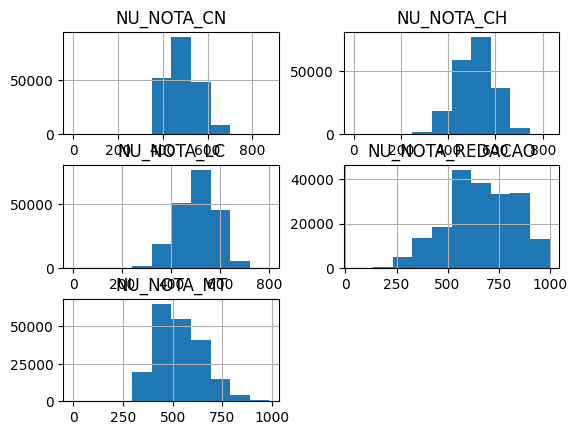

In [5]:
_db.hist(bins=10)

# 5
Realize a tarefa de regressão: predição do valor da prova a partir dos demais atributos

# a)

Defina e descreva seu método de avaliação e medidas de avaliação. (Para melhorar sua interpretação, inclua na sua avaliação avaliar os valores individuais esperados e preditos para uma pequena amostra de participantes do ENEM)


Resp:

para este usamos regressores e comparamos as metricas de erro:

Mean Absolute Error,Mean Squared Error,Mean Root Squared Error,Mean Absolute Error (percent),Coefficient of Determination.

## b)

Escolha um modelo de aprendizado de máquina. Faça experimentos com variações de parâmetros (se houver) do modelo de aprendizado de máquina.

199647 199647
0


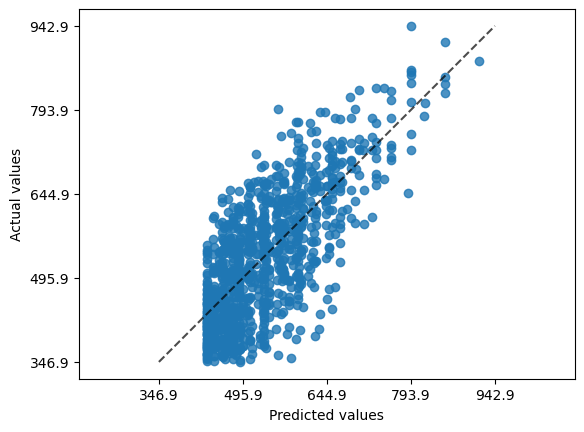

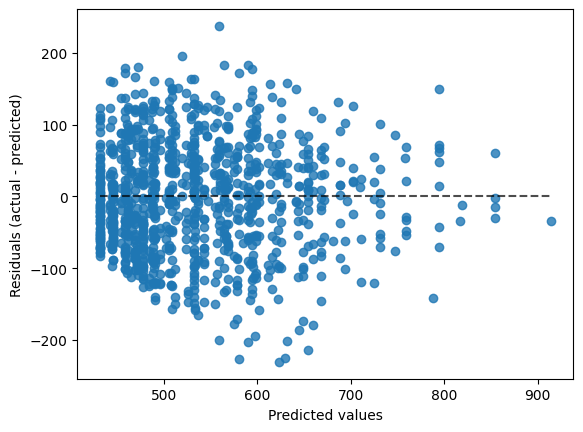

Mean Absolute Error: 62.528622082119035
Mean Squared Error: 6041.303920069105
Mean Root Squared Error: 77.72582530966851
Mean Absolute Error (percent): 184320657691580.03
Coefficient of Determination: 0.529387142169712
1


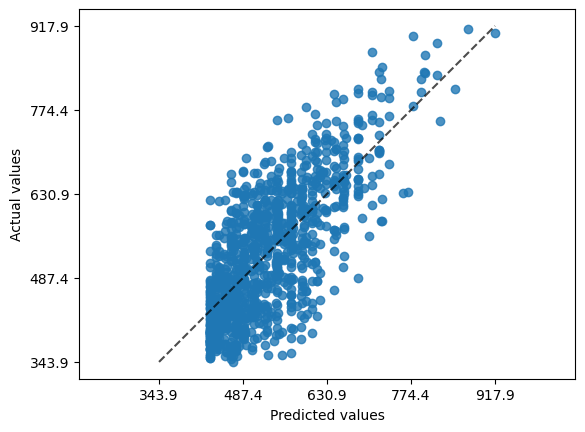

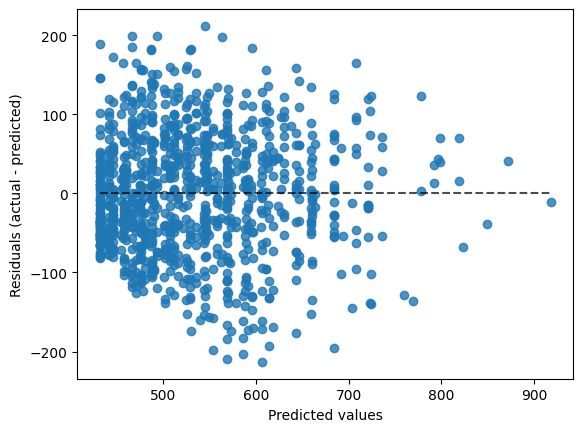

Mean Absolute Error: 62.70835248955804
Mean Squared Error: 6098.890529691813
Mean Root Squared Error: 78.09539378024681
Mean Absolute Error (percent): 126315245879280.25
Coefficient of Determination: 0.5262056921092484
2


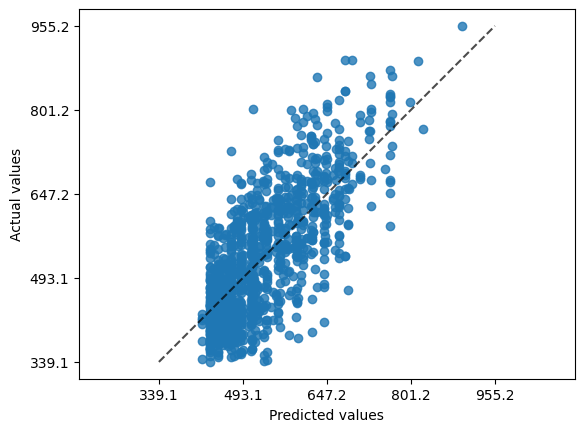

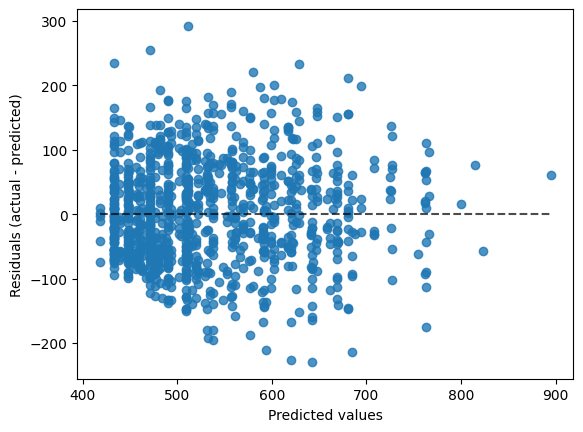

Mean Absolute Error: 62.83122930452161
Mean Squared Error: 6107.369320334341
Mean Root Squared Error: 78.14965975827624
Mean Absolute Error (percent): 166953604039085.56
Coefficient of Determination: 0.5238724581244081


In [6]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


from sklearn import  metrics
from sklearn.model_selection import KFold

# Quebre em varios testes

X = get_db(colunas, _db)
y = get_db(["NU_NOTA_MT"], _db)["NU_NOTA_MT"]
print(len(X), len(y))
from sklearn.metrics import PredictionErrorDisplay

from sklearn import metrics


# Evaluating Model's Performance


k_fold = KFold(3, shuffle=True, random_state=5)

regressor = DecisionTreeRegressor(max_depth=7)

for k, (train, test) in enumerate(k_fold.split(X, y)):
    print(k)
    regressor.fit(X.iloc[train], y.iloc[train])
    predicted = regressor.predict(X.iloc[test])
    display = PredictionErrorDisplay.from_predictions(y_true=y.iloc[test], y_pred=predicted, kind="actual_vs_predicted")
    display.plot()
    plt.show()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y.iloc[test], predicted))
    print('Mean Squared Error:', metrics.mean_squared_error(y.iloc[test], predicted))
    print('Mean Root Squared Error:', np.sqrt(metrics.mean_squared_error(y.iloc[test], predicted)))

    print('Mean Absolute Error (percent):', metrics.mean_absolute_percentage_error(y.iloc[test], predicted))

    print('Coefficient of Determination:', metrics.r2_score(y.iloc[test], predicted))


neste vemos que o erro ficou muito alto, e é possivel ver as faixas de predição usada pelo regressor em arvore.

## c)

Experimente variar o pré-processamento dos atributos, e executar novamente o experimento.

Neste aqui fomos removendo uma das notas para ver o comportamento do regressor com esse novo vetor de input, assi mcada teste tem um novo conjunto de input diferente.

In [7]:
for a in range(len(colunas)):
  print(f'removendo {colunas[a]}, fica: {colunas[:a] + colunas[a:]}')
  X = get_db(colunas[:a]+colunas[a:], _db)
  y = get_db(["NU_NOTA_MT"],_db)["NU_NOTA_MT"]
  print(len(X), len(y))

  k_fold = KFold(3, shuffle=True, random_state=5)

  regressor = DecisionTreeRegressor(max_depth=7)

  for k, (train, test) in enumerate(k_fold.split(X, y)):
      print(k)
      regressor.fit(X.iloc[train], y.iloc[train])
      predicted = regressor.predict(X.iloc[test])
      # display = PredictionErrorDisplay.from_predictions(y_true=y.iloc[test], y_pred=predicted, kind="actual_vs_predicted")
      # display.plot()
      # plt.show()
      print('Mean Absolute Error:', metrics.mean_absolute_error(y.iloc[test], predicted))
      print('Coefficient of Determination:', metrics.r2_score(y.iloc[test], predicted))
  print('\n')

removendo NU_NOTA_CN, fica: ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
199647 199647
0
Mean Absolute Error: 62.531714540307725
Coefficient of Determination: 0.5293072115238129
1
Mean Absolute Error: 62.70835248955805
Coefficient of Determination: 0.5262056921092485
2
Mean Absolute Error: 62.83122930452161
Coefficient of Determination: 0.5238724581244081


removendo NU_NOTA_CH, fica: ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
199647 199647
0
Mean Absolute Error: 62.52862208211902
Coefficient of Determination: 0.5293871421697118
1
Mean Absolute Error: 62.70835248955807
Coefficient of Determination: 0.5262056921092485
2
Mean Absolute Error: 62.831229304521635
Coefficient of Determination: 0.5238724581244081


removendo NU_NOTA_LC, fica: ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
199647 199647
0
Mean Absolute Error: 62.52862208211904
Coefficient of Determination: 0.5293871421697118
1
Mean Absolute Error: 62.708352489558045
Coefficien

neste obtemos que os resultados nao apresentam grande variação, com o Mean Absolute Error e Coefficient of Determination sem grandes mudanças nos testes.

## d)

Repita o experimento com pelo menos um outro modelo de aprendizado de máquina. 

aqui usamos um regressor linear para compara com o em arvore

199647 199647
0


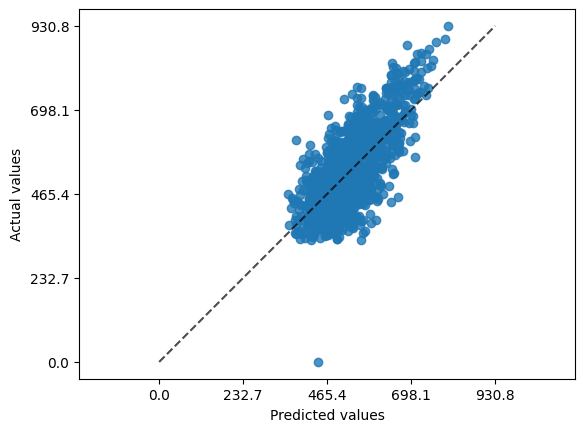

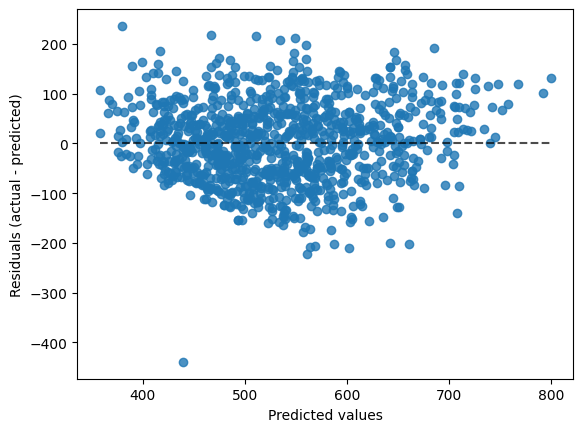

Mean Absolute Error: 63.61816235056521
Mean Absolute Error (percent): 179623730641055.0
Coefficient of Determination: 0.5110836073881995
1


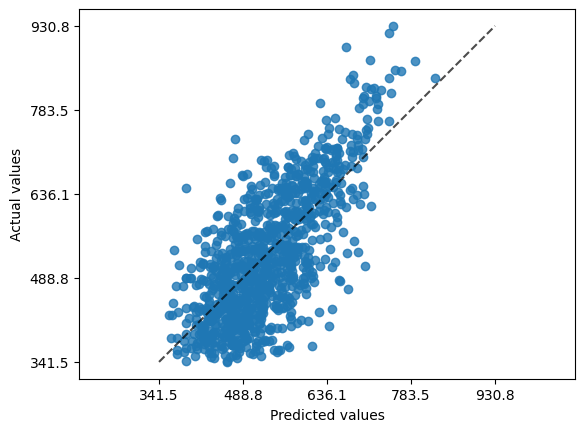

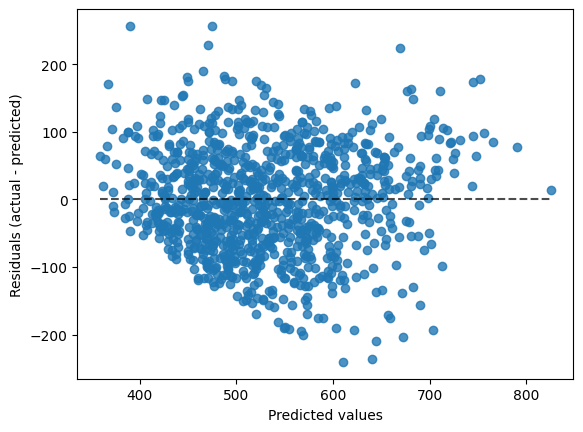

Mean Absolute Error: 63.945796290915005
Mean Absolute Error (percent): 107969431928880.25
Coefficient of Determination: 0.5068208709914532
2


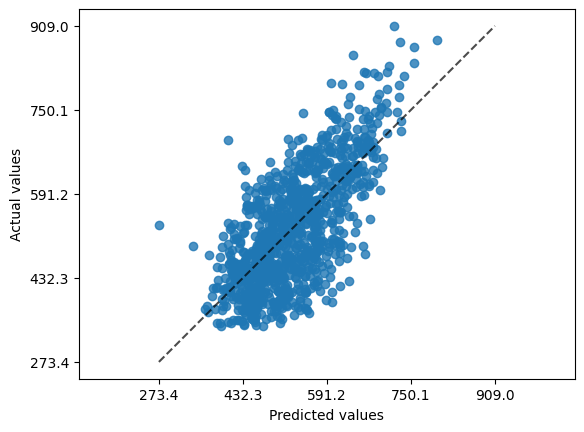

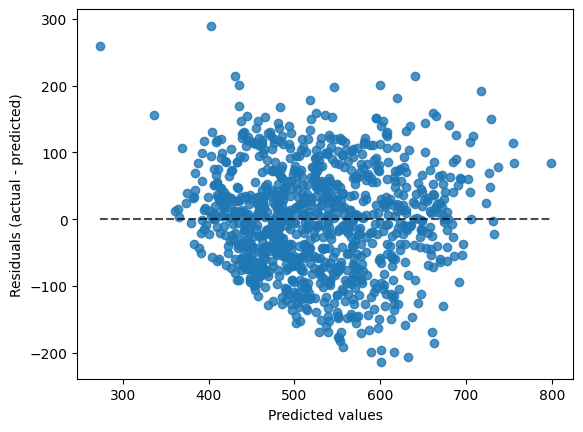

Mean Absolute Error: 64.09178496536238
Mean Absolute Error (percent): 107006938350738.98
Coefficient of Determination: 0.5055223139348883


In [8]:
from sklearn.linear_model import LinearRegression


X = get_db(colunas, _db)
y = get_db(["NU_NOTA_MT"], _db)["NU_NOTA_MT"]
print(len(X), len(y))

k_fold = KFold(3, shuffle=True, random_state=5)

regressor = LinearRegression()

for k, (train, test) in enumerate(k_fold.split(X, y)):
    print(k)
    regressor.fit(X.iloc[train], y.iloc[train])
    predicted = regressor.predict(X.iloc[test])
    display = PredictionErrorDisplay.from_predictions(y_true=y.iloc[test], y_pred=predicted, kind="actual_vs_predicted")
    display.plot()
    plt.show()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y.iloc[test], predicted))
    print('Mean Absolute Error (percent):', metrics.mean_absolute_percentage_error(y.iloc[test], predicted))
    print('Coefficient of Determination:', metrics.r2_score(y.iloc[test], predicted))




tambem percebemos que os Mean Absolute Error e Coefficient of Determination nao possuem grandes mudanças nos testes. porem apresentam resultado pior que o arvore, por possuir um erro maior e coeficiente de determinação menor

In [9]:
# from sklearn import metrics


# # Evaluating Model's Performance
# print('Mean Absolute Error:', metrics.mean_absolute_error(y, ypred))
# print('Mean Squared Error:', metrics.mean_squared_error(y, ypred))
# print('Mean Root Squared Error:', np.sqrt(metrics.mean_squared_error(y, ypred)))

# print('Mean Absolute Error (percent):', metrics.mean_absolute_percentage_error(y, ypred))

# print('Coefficient of Determination:', metrics.r2_score(y, ypred))
